In [ ]:
cd Desktop/Neuro_unicorn/

C:\Users\Abhay\Desktop\Neuro_unicorn


In [ ]:
cd Delhi/

[WinError 2] The system cannot find the file specified: 'Delhi/'
C:\Users\Abhay\Desktop\Neuro_unicorn\Delhi


In [ ]:
ls

 Volume in drive C is Windows
 Volume Serial Number is EC7E-F1E7

 Directory of C:\Users\Abhay\Desktop\Neuro_unicorn\Delhi

29-08-2024  17:08    <DIR>          .
29-08-2024  17:08    <DIR>          ..
28-08-2024  13:54    <DIR>          Abhishak Chaitnyadas
29-08-2024  15:04    <DIR>          Ajanam govind das
29-08-2024  17:08    <DIR>          Amrendra hari das ji
29-08-2024  13:50    <DIR>          Aradhya Gadadhara das
29-08-2024  11:48    <DIR>          Baliraj das
28-08-2024  19:10    <DIR>          Govind madhav das
28-08-2024  12:36    <DIR>          Mahinath
28-08-2024  14:57    <DIR>          Parth sarathi
28-08-2024  16:23    <DIR>          Prasanna Gaur das
28-08-2024  20:07    <DIR>          Ritik Roshan
28-08-2024  21:07    <DIR>          Veer Narshim Devas
               0 File(s)              0 bytes
              13 Dir(s)  569,748,561,920 bytes free


In [ ]:
cd Amrendra hari das ji

C:\Users\Abhay\Desktop\Neuro_unicorn\Delhi\Amrendra hari das ji


In [ ]:
cd ..

C:\Users\Abhay\Desktop\Neuro_unicorn\Delhi


In [ ]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is EC7E-F1E7

 Directory of C:\Users\Abhay\Desktop\Neuro_unicorn\Delhi\Amrendra hari das ji

29-08-2024  17:08    <DIR>          .
29-08-2024  17:08    <DIR>          ..
29-08-2024  17:08    <DIR>          part_1
29-08-2024  17:08    <DIR>          part_2
               0 File(s)              0 bytes
               4 Dir(s)  569,749,786,624 bytes free


In [ ]:
import glob
import pyxdf
import numpy as np

eeg_part1=glob.glob("part_1/*.xdf")[0]
eeg_part2=glob.glob("part_2/*.xdf")[0]


# Define the path to the XDF file
xdf_file_path = eeg_part2
resp_file=glob.glob("part_2/*.npy")[0]
resp=np.load(resp_file,allow_pickle=True).item()['markers']

resp

[[200, 1724930266.3056967, '1', '6', '1'],
 [200, 1724930318.790707, '1', '6', '1'],
 [200, 1724930352.0923924, '1', '2', '2'],
 [200, 1724930395.1773045, '1', '6', '1'],
 [200, 1724930436.3100452, '1', '5', '1'],
 [200, 1724930479.4905393, '2', '2', '1'],
 [200, 1724930532.0809147, '2', '1', '1'],
 [200, 1724930567.2682579, '1', '6', '1'],
 [200, 1724930612.0789206, '1', '1', '1'],
 [200, 1724930660.0339487, '1', '6', '1'],
 [200, 1724930698.0536985, '2', '1', '1'],
 [200, 1724930730.6721592, '2', '1', '1'],
 [200, 1724930763.2033587, '1', '6', '1'],
 [200, 1724930803.0808523, '2', '1', '1'],
 [200, 1724930848.1408324, '1', '5', '1'],
 [200, 1724930879.8613806, '1', '5', '1'],
 [200, 1724930917.9575253, '2', '2', '1'],
 [200, 1724930948.1065254, '1', '7', '1'],
 [200, 1724930977.9689307, '1', '5', '2'],
 [200, 1724931023.2638514, '1', '7', '1'],
 [200, 1724931068.7017481, '2', '3', '1'],
 [200, 1724931103.1537094, '2', '1', '1'],
 [200, 1724931145.9149697, '1', '6', '1'],
 [200, 17249

In [ ]:
np.load(resp_file,allow_pickle=True).item()['info']


{'Part. Name: ': 'Amrendra hari das ji',
 'Part. Number: ': '001',
 'Session. Number: ': '002',
 'Part. Gender: ': 'Male',
 'Part. Age:  ': '33',
 'Years of Meditation Practice': 'more than 3 years',
 'No of Rounds Chanting': '16',
 'Do you have normal or corrected-to-normal vision?': 'Yes',
 'Experiment By: ': 'Abhay'}

In [ ]:

# Read the XDF file
streams, header = pyxdf.load_xdf(xdf_file_path)
# print(len(streams))
# Iterate over streams in the file
data={}
timestamps={}
for stream in streams:
    # Print stream information
    if(len(stream['time_series'])<=1000 and stream['info']['name'][0]=='Unicorn'): continue
    print("Stream Name:", stream['info']['name'][0])
    print("Stream Type:", stream['info']['type'][0])
    print("Stream ID:", stream['info']['stream_id'])
    print("Stream #Channels:", len(stream['info']['channel_count']))
    print("Stream #Samples:", len(stream['time_series']))
    # print("First 10 Samples:", stream['time_series'][:10])  # Print first 10 samples
    print("")
    data[stream['info']['type'][0]]=stream['time_series']
    timestamps[stream['info']['type'][0]]=stream['time_stamps']

data['EEG'] = data.pop('Data')[:,:8]
timestamps['EEG'] = timestamps['Data']

# Optionally, you can also access the header information
print("Header Information:")
print(header)


Stream Name: MyMarkerStream
Stream Type: Markers
Stream ID: 1
Stream #Channels: 1
Stream #Samples: 30

Stream Name: UN-2023.06.22
Stream Type: Data
Stream ID: 2
Stream #Channels: 1
Stream #Samples: 299493

Header Information:
{'info': defaultdict(<class 'list'>, {'version': ['1.0'], 'datetime': ['2024-08-29T16:47:01+0530']})}


In [ ]:
timestamps['EEG']

array([405548.49827008, 405548.50226562, 405548.50626116, ...,
       406745.12285841, 406745.12685395, 406745.13084949])

In [ ]:
timestamps['Markers']

array([405593.63583851, 405646.12088757, 405679.42257821, 405722.50749876,
       405763.640231  , 405806.82072385, 405859.41109541, 405894.59843655,
       405939.4091016 , 405987.36413886, 406025.3837729 , 406058.00232264,
       406090.53341668, 406130.41100172, 406175.47099517, 406207.19155931,
       406245.28770055, 406275.43666089, 406305.29912232, 406350.59403707,
       406396.03192912, 406430.48384976, 406473.24515381, 406503.17328055,
       406537.99229039, 406571.41335762, 406614.60467657, 406647.54328921,
       406681.13328525, 406723.7512567 ])

In [ ]:
import mne
import numpy as np
import asrpy

# Cleaning the entire EEG
def get_filtered_eeg(raw):
    low_freq = 0.3
    high_freq = 100.0

    raw_filtered = raw.copy().notch_filter(freqs=50)

    # Apply the bandpass filter
    raw_filtered = raw_filtered.filter(l_freq=low_freq, h_freq=high_freq, fir_design='firwin')

    #ASR cleaning with cutoff=20
    asr = asrpy.ASR(sfreq=raw.info["sfreq"], cutoff=20)
    asr.fit(raw_filtered)
    raw_filtered = asr.transform(raw_filtered)

    ica = mne.preprocessing.ICA(n_components=15, max_iter="auto", random_state=97)
    ica.fit(raw_filtered)

    # ica.plot_components()

    ica.exclude = []
    # find which ICs match the EOG pattern; no EOG attached, Taking Fp1 as proxy
    eog_indices, eog_scores = ica.find_bads_eog(raw_filtered,ch_name="Fp1")
    ica.exclude = eog_indices
    ica.apply(raw_filtered)
    return raw_filtered

In [ ]:

ch_names = ['FZ', 'C3', 'CZ', 'C4', 'PZ', 'O1', 'OZ', 'O2']

sfreq = 250
info = mne.create_info(ch_names = ch_names, sfreq = sfreq,ch_types=['eeg']*8)
raw = mne.io.RawArray(data['EEG'].transpose()*1.0e-06 , info)
raw_filtered = raw.copy().notch_filter(freqs=50)
raw_filtered.filter(0.5, 100., fir_design='firwin')

raw_filtered = mne.set_eeg_reference(raw_filtered, ref_channels='average', copy=True)[0]


Creating RawArray with float64 data, n_channels=8, n_times=299493
    Range : 0 ... 299492 =      0.000 ...  1197.968 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopban

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


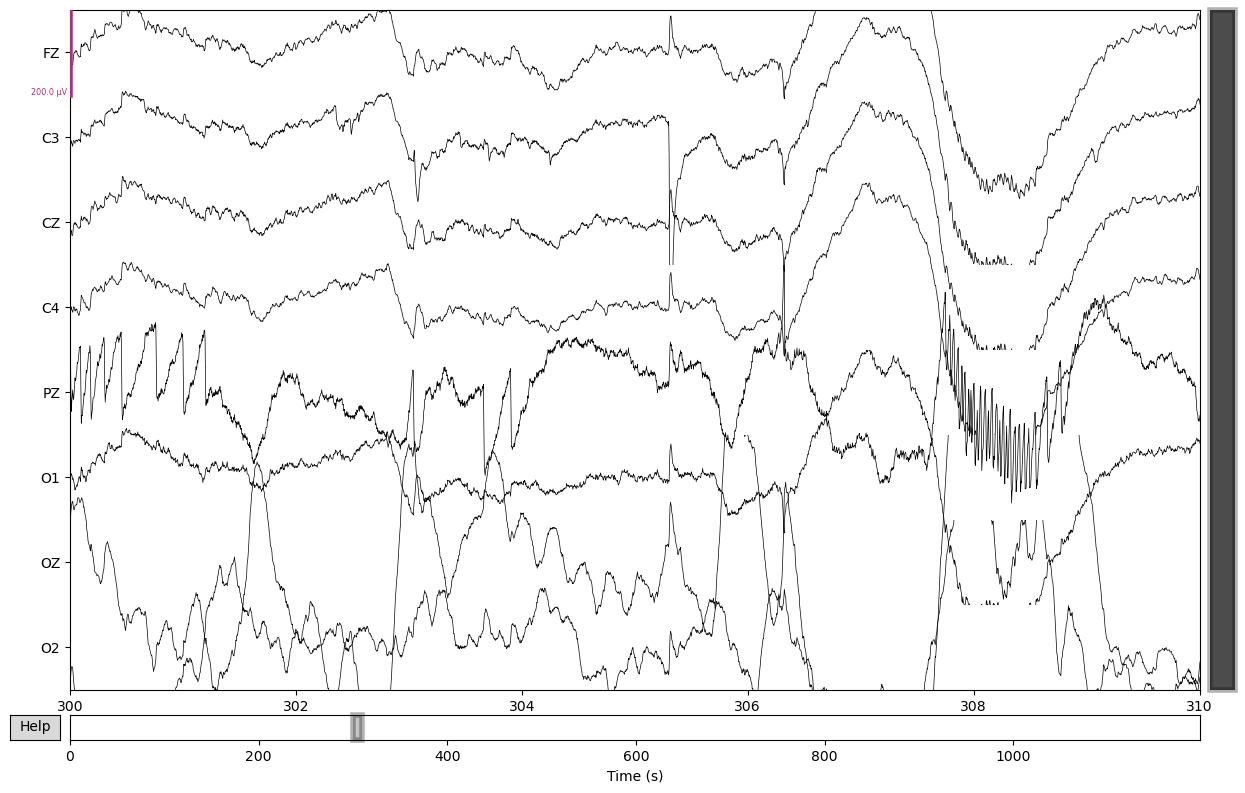

In [ ]:
fig=raw_filtered.plot(scalings={'eeg': 100e-6},start=300, duration=10)
fig.legend(loc='upper right')


In [ ]:

# eeg_notch.plot(duration=10,scalings={'eeg': 50e-6})

asr = asrpy.ASR(sfreq=raw.info["sfreq"], cutoff=15)
asr.fit(raw_filtered)
raw_filtered = asr.transform(raw_filtered)

# from meegkit.asr import ASR
# asr = ASR(sfreq=raw.info["sfreq"],cutoff=20)
# asr.fit(raw_filtered._data)
# raw_filtered = asr.transform(raw_filtered])


ica = mne.preprocessing.ICA(n_components=6, max_iter="auto", random_state=97)
ica.fit(raw_filtered)

ica.exclude = []
# find which ICs match the EOG pattern; no EOG attached, Taking Fp1 as proxy
eog_indices, eog_scores = ica.find_bads_eog(raw_filtered,ch_name="FZ")
ica.exclude = eog_indices
ica.apply(raw_filtered)



Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 6 components
Fitting ICA took 0.6s.
Using EOG channel: FZ
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Transforming to ICA space (6 components)
    Zeroing out 0 ICA components
    Projecting back using 8 PCA components


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


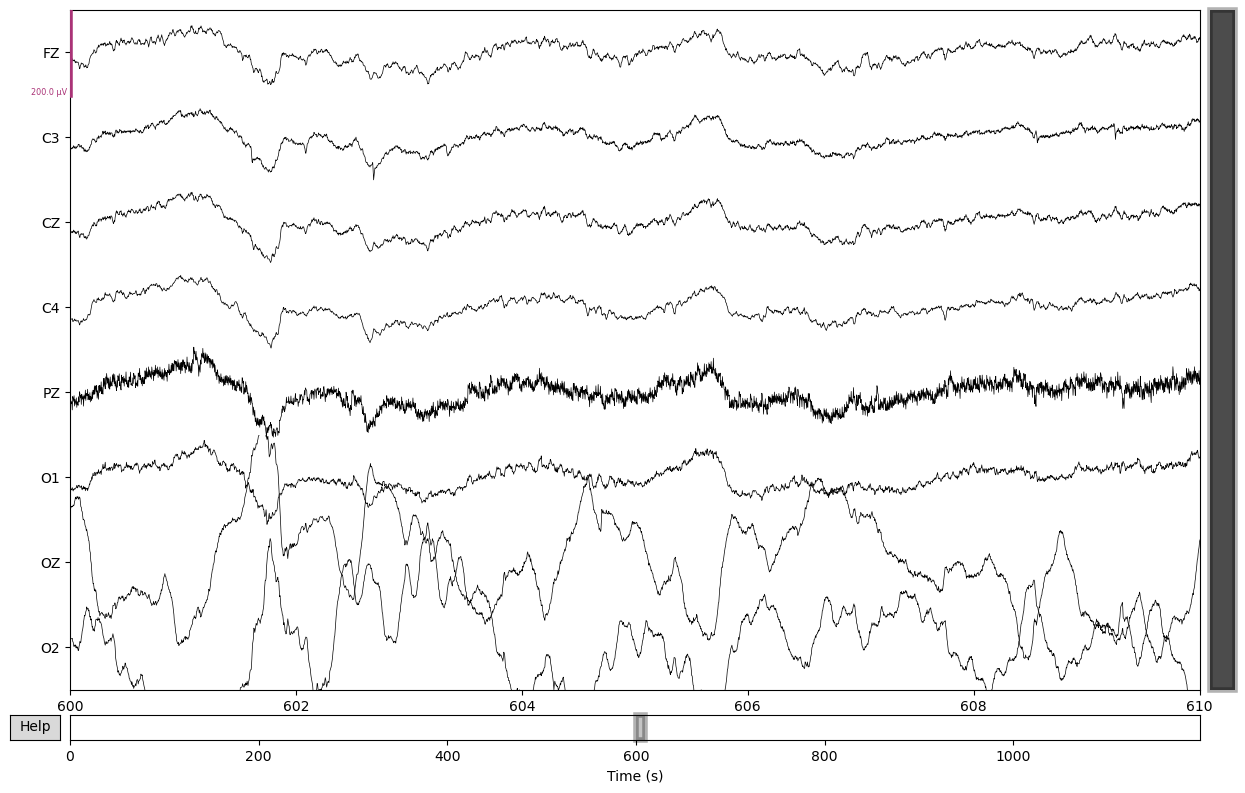

In [ ]:
fig=raw_filtered.plot(scalings={'eeg': 100e-6},start=600, duration=10)
fig.legend(loc='upper right')



In [ ]:
print("Data shape:", raw_filtered._data.shape)


Data shape: (8, 299493)


In [ ]:
events_for_mne=[]
for i,ts in enumerate(timestamps['Markers']):
    arr=timestamps['EEG']
    temp=min(range(len(arr)), key=lambda i: abs(arr[i] - ts))
    # idx.append(temp)
    if(resp[i][2]=='Rest'): marker=11
    else: marker=int(resp[i][2])
    events_for_mne.append([temp,0,marker])

raw_ev=raw_filtered.copy()
stim_info = mne.create_info(['STI 014'], raw_ev.info['sfreq'], ['stim'])
stim_channel_data = np.zeros((1, raw_ev.n_times))
# Create a new Raw object with the stim channel
raw_stim = mne.io.RawArray(stim_channel_data, stim_info)
# Combine the original Raw object with the new Raw object
raw_ev.add_channels([raw_stim], force_update_info=True)

raw_ev.add_events(np.array(events_for_mne), stim_channel='STI 014')


Creating RawArray with float64 data, n_channels=1, n_times=299493
    Range : 0 ... 299492 =      0.000 ...  1197.968 secs
Ready.


In [ ]:
events_for_mne

[[11297, 0, 1],
 [24433, 0, 1],
 [32768, 0, 1],
 [43551, 0, 1],
 [53846, 0, 1],
 [64653, 0, 2],
 [77815, 0, 2],
 [86622, 0, 1],
 [97837, 0, 1],
 [109839, 0, 1],
 [119354, 0, 2],
 [127518, 0, 2],
 [135660, 0, 1],
 [145641, 0, 2],
 [156918, 0, 1],
 [164857, 0, 1],
 [174392, 0, 2],
 [181937, 0, 1],
 [189411, 0, 1],
 [200748, 0, 1],
 [212120, 0, 2],
 [220742, 0, 2],
 [231445, 0, 1],
 [238935, 0, 2],
 [247650, 0, 1],
 [256014, 0, 1],
 [266824, 0, 1],
 [275068, 0, 2],
 [283475, 0, 1],
 [294141, 0, 1]]

In [ ]:
events = mne.find_events(raw_ev)
# Define event IDs
epochs_dict={}

tmin = -3.5  # Start time relative to the event onset
tmax = -0.0   # End time relative to the event onset

if(1 in events):
    epochs_dict[1]=mne.Epochs(raw_ev, events, event_id={'Med': 1},
                              tmin=tmin, tmax=tmax, baseline=None,
                              preload=True,reject={'eeg': 500e-6})

if(2 in events):
    epochs_dict[2]=mne.Epochs(raw_ev, events, event_id={'MW': 2},
                              tmin=tmin, tmax=tmax, baseline=None,
                              preload=True,reject={'eeg': 500e-6})

30 events found on stim channel STI 014
Event IDs: [1 2]
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 876 original time points ...
    Rejecting  epoch based on EEG : ['OZ']
    Rejecting  epoch based on EEG : ['OZ']
    Rejecting  epoch based on EEG : ['OZ']
    Rejecting  epoch based on EEG : ['OZ', 'O2']
    Rejecting  epoch based on EEG : ['OZ']
    Rejecting  epoch based on EEG : ['OZ', 'O2']
    Rejecting  epoch based on EEG : ['PZ', 'OZ', 'O2']
    Rejecting  epoch based on EEG : ['OZ', 'O2']
    Rejecting  epoch based on EEG : ['OZ']
    Rejecting  epoch based on EEG : ['OZ']
    Rejecting  epoch based on EEG : ['OZ', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['OZ', 'O2']
    Rejecting  epoch based on EEG : ['OZ', 'O2']
    Rejecting  epoch based on EEG : ['OZ']
15 bad epochs dropped
Not setting metadata
10 matching events found

In [ ]:
epochs_dict[1]

Number of events,5
Events,Med: 5
Time range,-3.500 – 0.000 s
Baseline,off


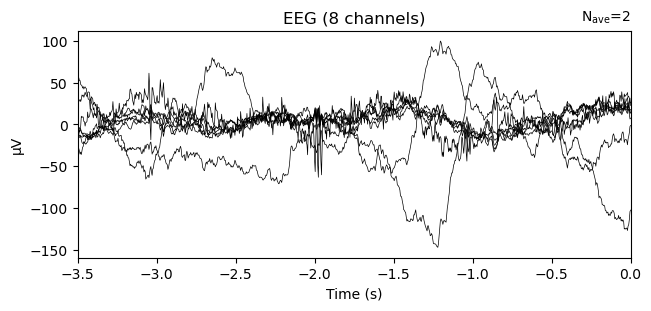

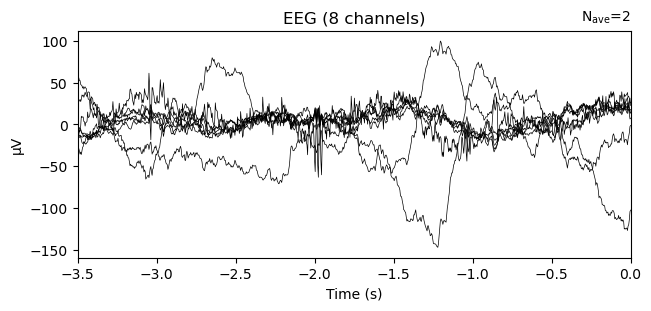

In [ ]:
epochs_dict[2].average().plot()

In [ ]:
epochs_dict[1].average().compute_psd(fmin=0.5, fmax=40).get_data().shape

    Using multitaper spectrum estimation with 7 DPSS windows


(8, 139)

Effective window size : 3.504 (s)
Effective window size : 3.504 (s)


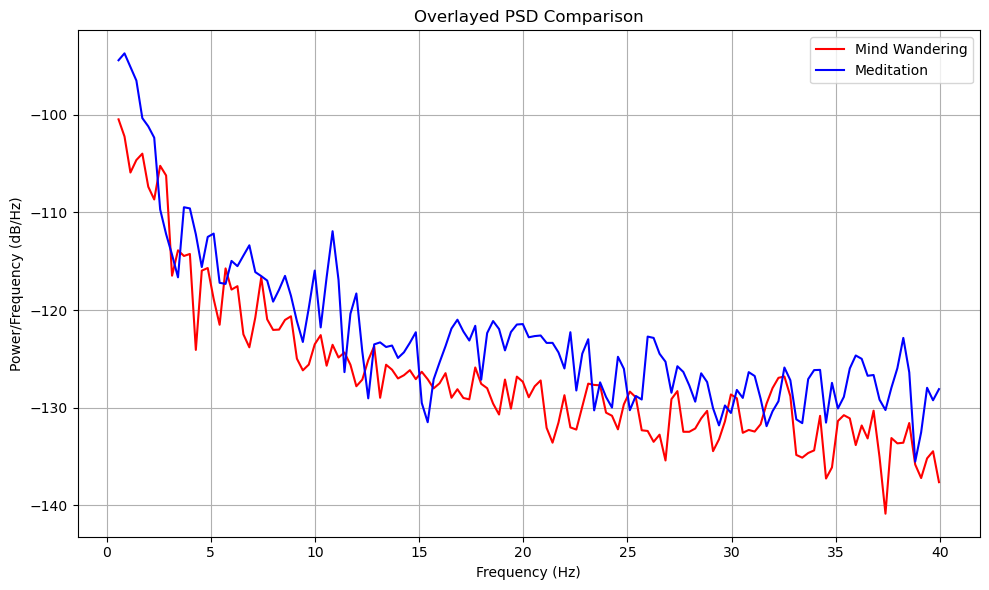

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute PSD for each MNE object
psd1 = epochs_dict[1].average().compute_psd(fmin=0.5, fmax=40, method='welch')
psd2 = epochs_dict[2].average().compute_psd(fmin=0.5, fmax=40, method='welch')

# Extract PSD and frequency data using .get_data()
psd1_data, freq1 = psd1.get_data(return_freqs=True)
psd2_data, freq2 = psd2.get_data(return_freqs=True)

# Average PSD across channels
psd1_mean = psd1_data.mean(axis=0)  # Average across channels for PSD1
psd2_mean = psd2_data.mean(axis=0)  # Average across channels for PSD2

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the PSD for the first MNE object
ax.plot(freq1, 10 * np.log10(psd1_mean), 'r-', label='Mind Wandering')

# Plot the PSD for the second MNE object
ax.plot(freq2, 10 * np.log10(psd2_mean), 'b-', label='Meditation')

# Add titles and labels
ax.set_title('Overlayed PSD Comparison')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power/Frequency (dB/Hz)')
ax.grid(True)

# Add a legend to distinguish between the two plots
ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
epochs_dict[1].average().pick(['FZ']).compute_psd(fmin=0.5,fmax=40).plot()

RuntimeError: epochs.average() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.

In [ ]:
epochs_dict[2].average().pick(['FZ']).compute_psd(fmin=0.5,fmax=40).plot()

RuntimeError: epochs.average() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.

In [ ]:
x=epochs_dict[1].average()
x

RuntimeError: epochs.average() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.

In [ ]:
epochs_dict[2].average().compute_psd(fmin=0.5,fmax=40).plot()

RuntimeError: epochs.average() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.

In [ ]:
psd2=epochs_dict[2].average().compute_psd().get_data()
psd1=epochs_dict[1].average().compute_psd().get_data()


RuntimeError: epochs.average() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.

In [ ]:
def bandpower(data, sf, band, method='welch', window_sec=None, relative=False):
    """Compute the average power of the signal x in a specific frequency band.

    Requires MNE-Python >= 0.14.

    Parameters
    ----------
    data : 1d-array
      Input signal in the time-domain.
    sf : float
      Sampling frequency of the data.
    band : list
      Lower and upper frequencies of the band of interest.
    method : string
      Periodogram method: 'welch' or 'multitaper'
    window_sec : float
      Length of each window in seconds. Useful only if method == 'welch'.
      If None, window_sec = (1 / min(band)) * 2.
    relative : boolean
      If True, return the relative power (= divided by the total power of the signal).
      If False (default), return the absolute power.

    Return
    ------
    bp : float
      Absolute or relative band power.
    """
    from scipy.signal import welch
    from scipy.integrate import simpson
    from mne.time_frequency import psd_array_multitaper

    band = np.asarray(band)
    low, high = band

    # Compute the modified periodogram (Welch)
    if method == 'welch':
        if window_sec is not None:
            nperseg = window_sec * sf
        else:
            nperseg = (2 / low) * sf

        freqs, psd = welch(data, sf, nperseg=nperseg)

    elif method == 'multitaper':
        psd, freqs = psd_array_multitaper(data, sf, adaptive=True,
                                          normalization='full', verbose=0)



    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find index of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # print(freqs.shape, psd.shape)
    # Integral approximation of the spectrum using parabola (Simpson's rule)
    bp = simpson(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simpson(psd, dx=freq_res)
    return bp

In [ ]:
raw.info.ch_names

['FZ', 'C3', 'CZ', 'C4', 'PZ', 'O1', 'OZ', 'O2']

In [ ]:
evoked1 = epochs_dict[1].average()
evoked2 = epochs_dict[2].average()
freq_bands = {'delta': [0.5, 4],
            'theta': [4, 8],
            'alpha': [8, 13],
            'beta': [13, 30],
            'gamma': [30, 45]}
bp_rel1=[]
bp_rel2=[]
for key in freq_bands:
    for idx,ch in enumerate(['FZ', 'C3', 'CZ', 'C4', 'PZ', 'O1', 'OZ', 'O2']):
        bp_rel1.append([bandpower(evoked1.get_data()[idx], 250.0, freq_bands[key], 'multitaper', relative=True),
                       key,ch])
        bp_rel2.append([bandpower(evoked2.get_data()[idx], 250.0, freq_bands[key], 'multitaper', relative=True),
                       key,ch])

bp1=[]
bp2=[]
for key in freq_bands:
    for idx,ch in enumerate(['FZ', 'C3', 'CZ', 'C4', 'PZ', 'O1', 'OZ', 'O2']):
        bp1.append([bandpower(evoked1.get_data()[idx], 250.0, freq_bands[key], 'multitaper', relative=False),
                   key,ch])
        bp2.append([bandpower(evoked2.get_data()[idx], 250.0, freq_bands[key], 'multitaper', relative=False),
                   key,ch])

print(bp1)
print(bp2)

import pandas as pd
df_1=pd.DataFrame(bp_rel1,columns=['val1','bp1','ch1'])
df_2=pd.DataFrame(bp_rel2,columns=['val2','bp2','ch2'])


In [ ]:
pd.concat([df_1,df_2],axis=1)

In [ ]:
df  = pd.concat([df_1,df_2],axis=1)

In [ ]:
chanting_exp = np.load(resp_file,allow_pickle=True).item()['info']['Years of Meditation Practice']

In [ ]:
df["chanting_experince"]=chanting_exp

In [ ]:
final_df = pd.concat([final_df, df], ignore_index=True)

In [ ]:
final_df

,val1,bp1,ch1,val2,bp2,ch2,chanting_experince
0,0.526441,delta,FZ,0.608849,delta,FZ,more than 3 years
1,0.427206,delta,C3,0.534744,delta,C3,more than 3 years
2,0.379116,delta,CZ,0.635703,delta,CZ,more than 3 years
3,0.426853,delta,C4,0.540694,delta,C4,more than 3 years
4,0.427033,delta,PZ,0.592897,delta,PZ,more than 3 years
...,...,...,...,...,...,...,...
595,0.039077,gamma,C4,0.034805,gamma,C4,more than 3 years
596,0.006278,gamma,PZ,0.008880,gamma,PZ,more than 3 years
597,0.046606,gamma,O1,0.044974,gamma,O1,more than 3 years
598,0.037418,gamma,OZ,0.034206,gamma,OZ,more than 3 years


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   val1                600 non-null    float64
 1   bp1                 600 non-null    object 
 2   ch1                 600 non-null    object 
 3   val2                600 non-null    float64
 4   bp2                 600 non-null    object 
 5   ch2                 600 non-null    object 
 6   chanting_experince  600 non-null    object 
dtypes: float64(2), object(5)
memory usage: 32.9+ KB


In [ ]:
final_df['chanting_experince'].unique()

array(['more than 3 years', '2 to 3 years', '< 1 year', '1 to 2 years'],
      dtype=object)

In [ ]:
final_df['bp_diff'] = final_df['val1'] - final_df['val2']

In [ ]:
final_df

,val1,bp1,ch1,val2,bp2,ch2,chanting_experince,bp_diff
0,0.526441,delta,FZ,0.608849,delta,FZ,more than 3 years,-0.082408
1,0.427206,delta,C3,0.534744,delta,C3,more than 3 years,-0.107538
2,0.379116,delta,CZ,0.635703,delta,CZ,more than 3 years,-0.256587
3,0.426853,delta,C4,0.540694,delta,C4,more than 3 years,-0.113840
4,0.427033,delta,PZ,0.592897,delta,PZ,more than 3 years,-0.165865
...,...,...,...,...,...,...,...,...
595,0.039077,gamma,C4,0.034805,gamma,C4,more than 3 years,0.004273
596,0.006278,gamma,PZ,0.008880,gamma,PZ,more than 3 years,-0.002602
597,0.046606,gamma,O1,0.044974,gamma,O1,more than 3 years,0.001632
598,0.037418,gamma,OZ,0.034206,gamma,OZ,more than 3 years,0.003212


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
summary_stats = final_df.groupby('chanting_experince')[['val1', 'val2']].describe()
print("Summary Statistics by Chanting Experience:")
print(summary_stats)

Summary Statistics by Chanting Experience:
                     val1                                                    \
                    count      mean       std       min       25%       50%   
chanting_experince                                                            
1 to 2 years         80.0  0.157726  0.149176  0.007545  0.049826  0.100118   
2 to 3 years        120.0  0.159514  0.164647  0.005281  0.035143  0.086338   
< 1 year             80.0  0.154286  0.145355  0.003026  0.041729  0.093009   
more than 3 years   320.0  0.142400  0.145572  0.004114  0.039121  0.072229   

                                         val2                                \
                         75%       max  count      mean       std       min   
chanting_experince                                                            
1 to 2 years        0.226698  0.560577   80.0  0.155973  0.156556  0.011149   
2 to 3 years        0.264363  0.705852  120.0  0.155179  0.155978  0.002745   
< 1 year

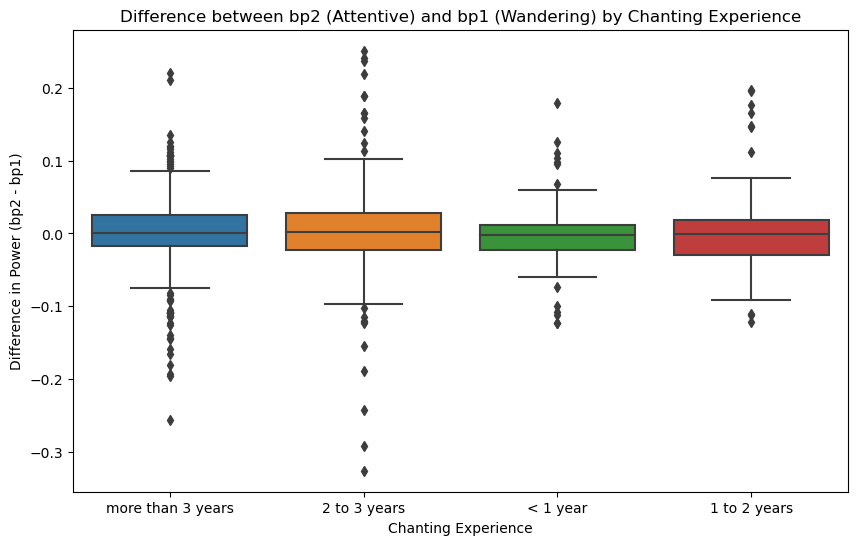

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='chanting_experince', y='bp_diff', data=final_df)
plt.title('Difference between bp2 (Attentive) and bp1 (Wandering) by Chanting Experience')
plt.xlabel('Chanting Experience')
plt.ylabel('Difference in Power (bp2 - bp1)')
plt.show()

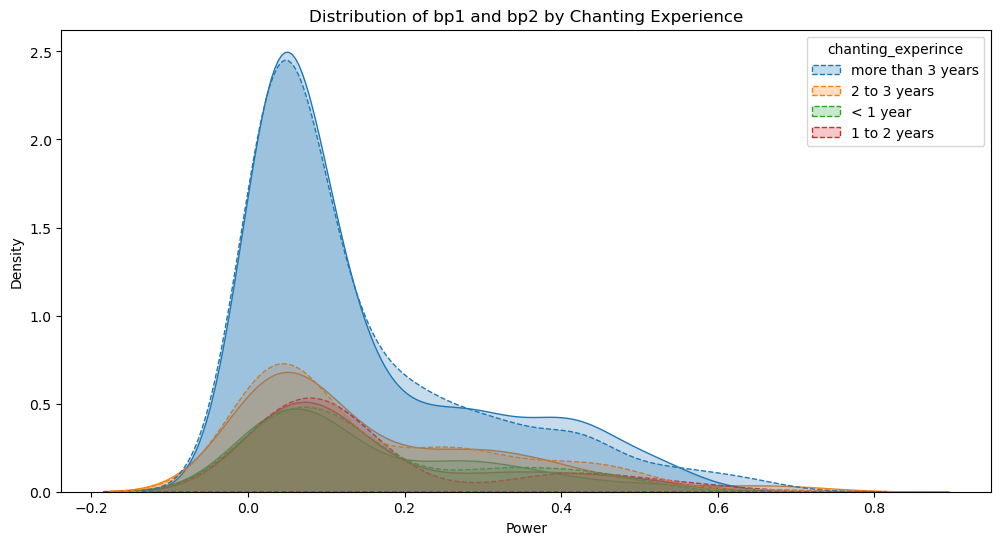

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=final_df, x='val1', hue='chanting_experince', fill=True)
sns.kdeplot(data=final_df, x='val2', hue='chanting_experince', fill=True, linestyle='--')
plt.title('Distribution of bp1 and bp2 by Chanting Experience')
plt.xlabel('Power')
plt.ylabel('Density')
plt.show()

In [ ]:
mean_diff = final_df.groupby('chanting_experince')['bp_diff'].mean()
print("Mean Difference (bp2 - bp1) by Chanting Experience:")
print(mean_diff)

Mean Difference (bp2 - bp1) by Chanting Experience:
chanting_experince
1 to 2 years         0.001753
2 to 3 years         0.004335
< 1 year            -0.001493
more than 3 years   -0.000026
Name: bp_diff, dtype: float64


In [ ]:

import scipy.stats as stats


# 1. ANOVA Test for Differences Across Chanting Experience

anova_results = {}

# Loop over each unique power band
for band in final_df['bp1'].unique():
    # Filter the dataframe for the current power band
    data = final_df[final_df['bp1'] == band]

    # Perform one-way ANOVA
    f_val, p_val = stats.f_oneway(
        data[data['chanting_experince'] == 'more than 3 years']['val1'],
        data[data['chanting_experince'] == '2 to 3 years']['val1'],
        data[data['chanting_experince'] == '< 1 year']['val1'],
        data[data['chanting_experince'] == '1 to 2 years']['val1']
    )

    # Store the results
    anova_results[band] = {'F-statistic': f_val, 'p-value': p_val}

# Display the ANOVA results
print("ANOVA Results for Different Power Bands Across Chanting Experience:")
for band, result in anova_results.items():
    print(f"{band}: F-statistic = {result['F-statistic']:.4f}, p-value = {result['p-value']:.4f}")


ANOVA Results for Different Power Bands Across Chanting Experience:
delta: F-statistic = 7.4296, p-value = 0.0001
theta: F-statistic = 1.0397, p-value = 0.3778
alpha: F-statistic = 11.4950, p-value = 0.0000
beta: F-statistic = 2.6271, p-value = 0.0536
gamma: F-statistic = 4.7329, p-value = 0.0038


In [ ]:
import scipy.stats as stats

# Function to perform ANOVA for a given band and value type (val1 or val2)
def perform_anova(df, value_column, band_column):
    # Create a dictionary to store the results
    anova_results = {}

    # Loop over each unique power band
    for band in df[band_column].unique():
        # Filter the dataframe for the current power band
        data = df[df[band_column] == band]

        # Perform one-way ANOVA
        f_val, p_val = stats.f_oneway(
            data[data['chanting_experince'] == 'more than 3 years'][value_column],
            data[data['chanting_experince'] == '2 to 3 years'][value_column],
            data[data['chanting_experince'] == '< 1 year'][value_column],
            data[data['chanting_experince'] == '1 to 2 years'][value_column]
        )

        # Store the results
        anova_results[band] = {'F-statistic': f_val, 'p-value': p_val}

    return anova_results

# Perform ANOVA for val1 (bp1)
anova_results_val1 = perform_anova(final_df, 'val1', 'bp1')
# Perform ANOVA for val2 (bp2)
anova_results_val2 = perform_anova(final_df, 'val2', 'bp2')

# Display the ANOVA results for val1
print("ANOVA Results for Different Power Bands Across Chanting Experience (val1 and bp1):")
for band, result in anova_results_val1.items():
    print(f"{band}: F-statistic = {result['F-statistic']:.4f}, p-value = {result['p-value']:.4f}")

# Display the ANOVA results for val2
print("\nANOVA Results for Different Power Bands Across Chanting Experience (val2 and bp2):")
for band, result in anova_results_val2.items():
    print(f"{band}: F-statistic = {result['F-statistic']:.4f}, p-value = {result['p-value']:.4f}")


ANOVA Results for Different Power Bands Across Chanting Experience (val1 and bp1):
delta: F-statistic = 7.4296, p-value = 0.0001
theta: F-statistic = 1.0397, p-value = 0.3778
alpha: F-statistic = 11.4950, p-value = 0.0000
beta: F-statistic = 2.6271, p-value = 0.0536
gamma: F-statistic = 4.7329, p-value = 0.0038

ANOVA Results for Different Power Bands Across Chanting Experience (val2 and bp2):
delta: F-statistic = 6.1912, p-value = 0.0006
theta: F-statistic = 3.4418, p-value = 0.0191
alpha: F-statistic = 8.8318, p-value = 0.0000
beta: F-statistic = 2.4922, p-value = 0.0636
gamma: F-statistic = 6.5199, p-value = 0.0004


In [ ]:
final_df

,val1,bp1,ch1,val2,bp2,ch2,chanting_experince,bp_diff
0,0.526441,delta,FZ,0.608849,delta,FZ,more than 3 years,-0.082408
1,0.427206,delta,C3,0.534744,delta,C3,more than 3 years,-0.107538
2,0.379116,delta,CZ,0.635703,delta,CZ,more than 3 years,-0.256587
3,0.426853,delta,C4,0.540694,delta,C4,more than 3 years,-0.113840
4,0.427033,delta,PZ,0.592897,delta,PZ,more than 3 years,-0.165865
...,...,...,...,...,...,...,...,...
595,0.039077,gamma,C4,0.034805,gamma,C4,more than 3 years,0.004273
596,0.006278,gamma,PZ,0.008880,gamma,PZ,more than 3 years,-0.002602
597,0.046606,gamma,O1,0.044974,gamma,O1,more than 3 years,0.001632
598,0.037418,gamma,OZ,0.034206,gamma,OZ,more than 3 years,0.003212
